## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from joblib import dump, load

## Reading data

In [103]:
data = pd.read_csv('https://raw.githubusercontent.com/kxerxess/Diabetes-Prediction/master/data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Handling missing data

Replacing missing '0' values with numpy NaNs

In [105]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Missing value count

In [106]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

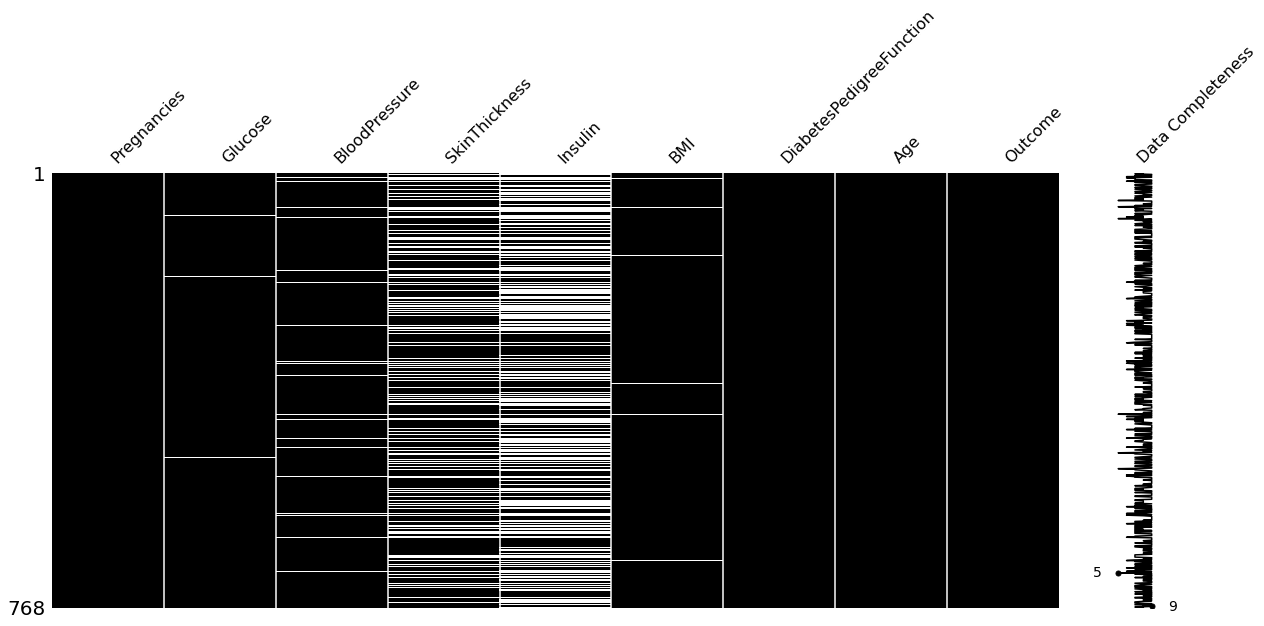

In [107]:
msno.matrix(data, figsize = (20, 8), labels = True, color = (0.0, 0.0, 0.0))
plt.show()

Functions to calculate & replace missing values with medians

In [108]:
def get_median(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [109]:
def put_median(var):
    data.loc[(data['Outcome'] == 0 ) & (data[var].isnull()), var] = float(get_median(var).loc[get_median(var)['Outcome']==0][var])
    data.loc[(data['Outcome'] == 1 ) & (data[var].isnull()), var] = float(get_median(var).loc[get_median(var)['Outcome']==1][var])

In [110]:
put_median('Insulin')
put_median('Glucose')
put_median('BloodPressure')
put_median('SkinThickness')
put_median('BMI')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [111]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Initial Correlation Map

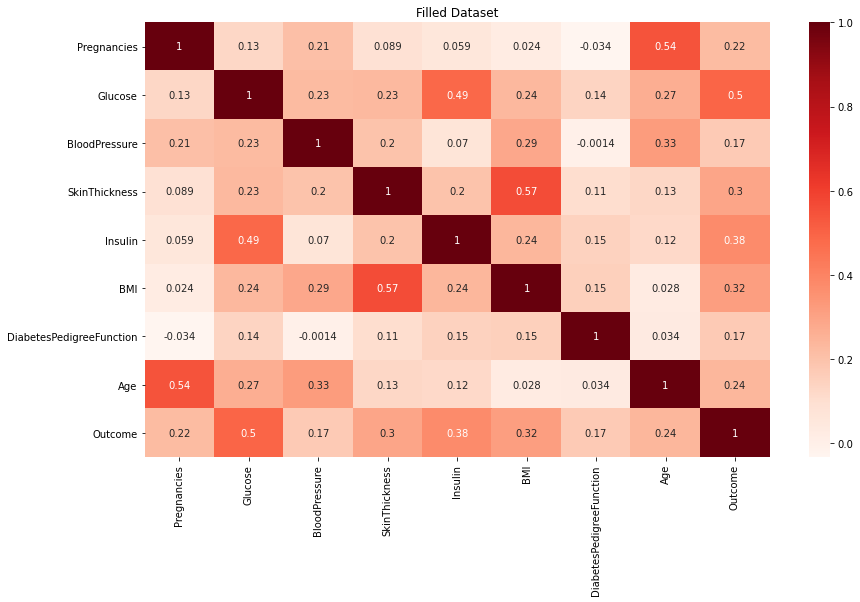

In [112]:
plt.figure(figsize = (14, 8))
sns.heatmap(data.corr(), annot = True, cmap = 'Reds')
plt.title("Filled Dataset")
plt.show()

# Feature Engineering

Feature wise Pair Plots

<Figure size 2880x2880 with 0 Axes>

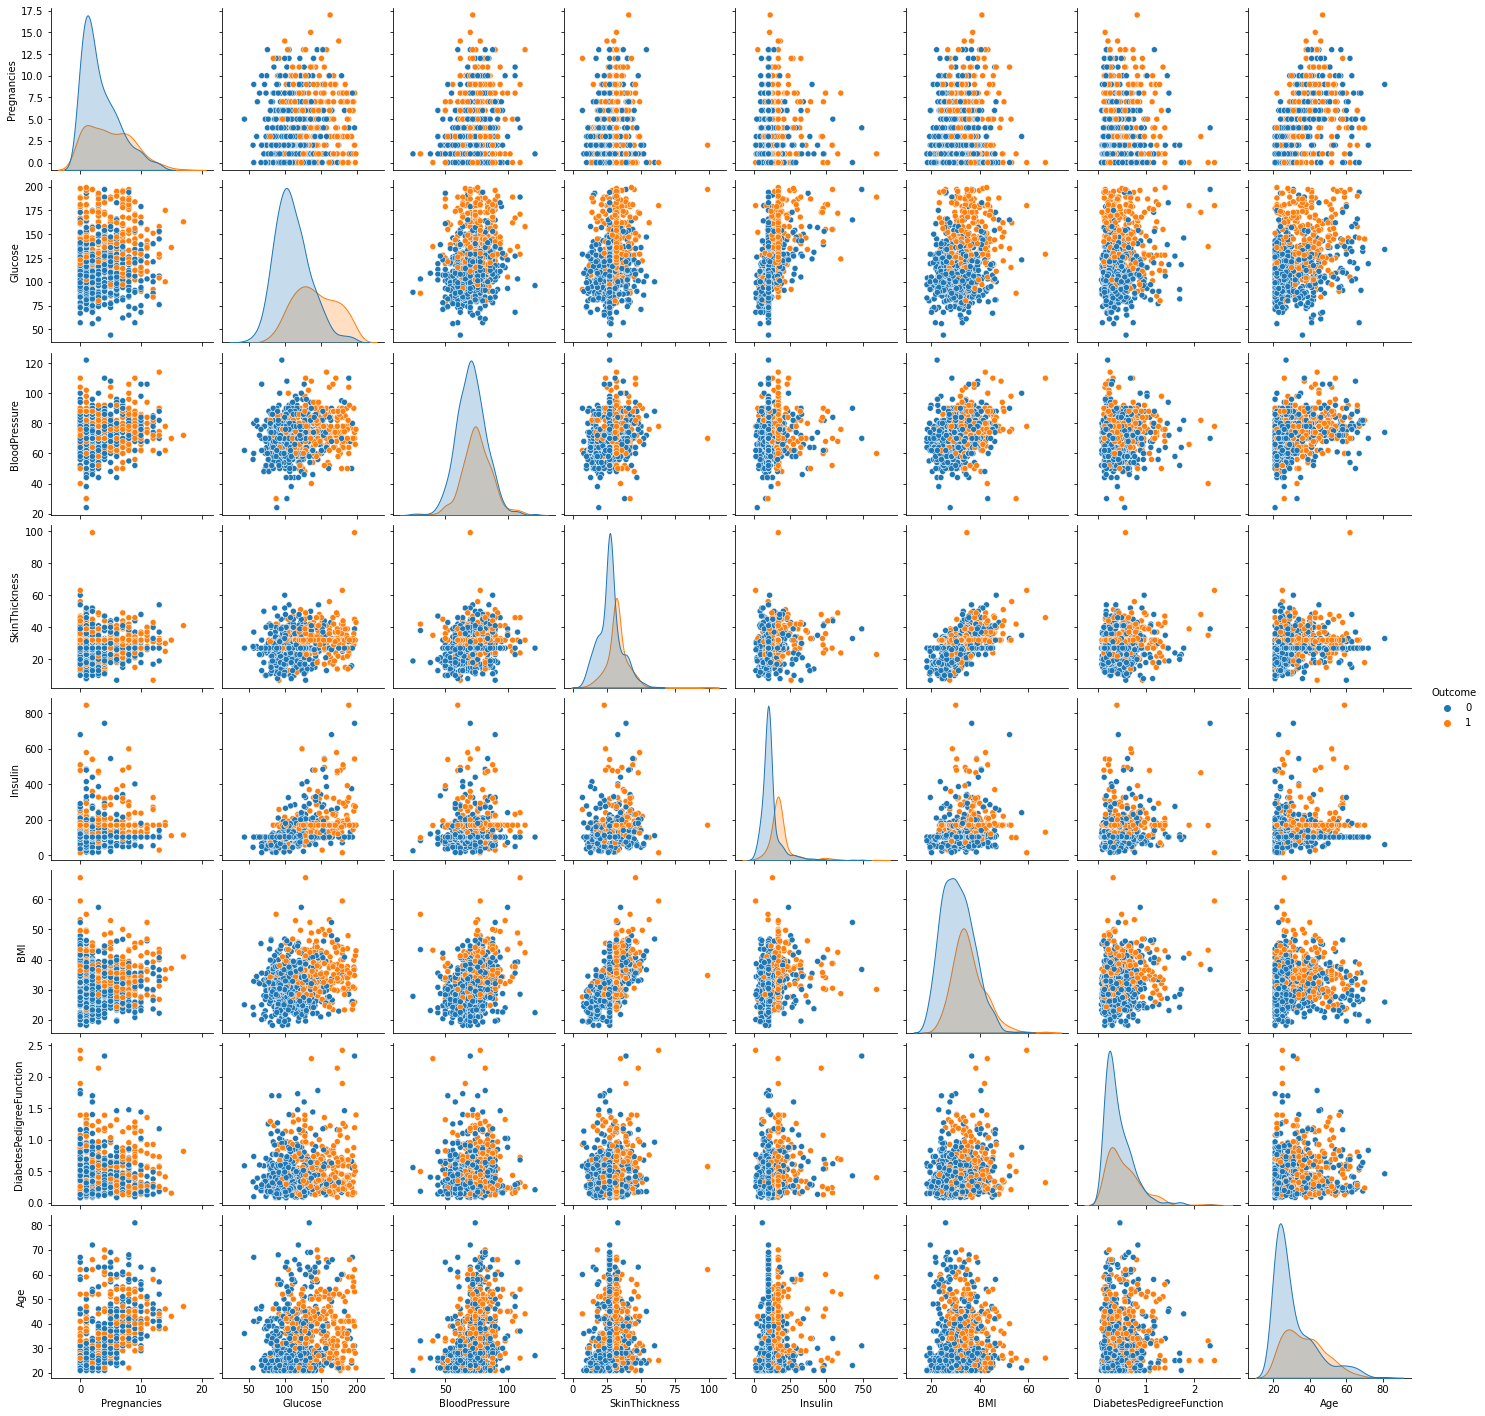

In [113]:
plt.figure(figsize=(40,40))
sns.pairplot(data, hue = 'Outcome', diag_kind='kde')
plt.show()

In [114]:
# Function to generate a scatter plot of two variables
def plot_fvf(f1, f2) :  
    D = data[(data['Outcome'] != 0)]
    N = data[(data['Outcome'] == 0)]
    dplot = go.Scatter(
        x = D[f1],
        y = D[f2],
        name = 'Diabetic',
        mode = 'markers', 
        marker = dict(color = '#EF5350',
            line = dict(
                width = 1)))

    ndplot = go.Scatter(
        x = N[f1],
        y = N[f2],
        name = 'Non-Diabetic',
        mode = 'markers',
        marker = dict(color = '#1E88E5',
            line = dict(
                width = 1)))

    layout = dict(title = f1 +" "+"vs"+" "+ f2,
                  yaxis = dict(title = f2,zeroline = False),
                  xaxis = dict(title = f1, zeroline = False)
                 )

    plots = [dplot, ndplot]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [115]:
# Function to generate distribution plot of one variable
def plot_distribution(var, size_bin) :  
    D = data[(data['Outcome'] != 0)]
    N = data[(data['Outcome'] == 0)]
    tmp1 = D[var]
    tmp2 = N[var]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Diabetic', 'Non-Diabetic']
    colors = ['#EF5350', '#1E88E5']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = var)

    py.iplot(fig, filename = 'Density plot')

## Pair Plot Analysis & Feature Generation

In [116]:
plot_fvf('Glucose','Pregnancies')

Glucose vs Pregnancies  
Pregnancies <= 5  
Glucose <= 105

In [117]:
data.loc[:,'Gen_GvP_0']=0
data.loc[(data['Pregnancies']<=5) & (data['Glucose']<=105),'Gen_GvP_0']=1
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0


In [118]:
plot_fvf('Glucose','BloodPressure')

Glucose vs BloodPressure  
BloodPressure <= 80  
Glucose <= 105

In [119]:
data.loc[:,'Gen_GvBP_1']=0
data.loc[(data['BloodPressure']<=80) & (data['Glucose']<=105),'Gen_GvBP_1']=1
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0,Gen_GvBP_1
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,1
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0


In [120]:
plot_fvf('Glucose','Insulin')

Glucose vs Insulin  
Insulin <= 110  
Glucose <= 105

In [121]:
data.loc[:,'Gen_GvI_2']=0
data.loc[(data['Insulin']<=110) & (data['Glucose']<=105),'Gen_GvI_2']=1
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0,Gen_GvBP_1,Gen_GvI_2
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,1,1
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,1,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,0


In [122]:
plot_fvf('Glucose','Age')

Glucose vs Age  
Age <= 29  
Glucose <= 120

In [123]:
data.loc[:,'Gen_GvA_3']=0
data.loc[(data['Age']<=29) & (data['Glucose']<=120),'Gen_GvA_3']=1
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0,Gen_GvBP_1,Gen_GvI_2,Gen_GvA_3
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,0,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,1,1,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,1,1,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,0,0


According to Wikipedia, people with a BMI of more than 30 are categorized as obese. And obese people are highly prone to being Diabetic.  
Hence, we create a new feature for Obesity with a threshold of 30 kg/m^2.

In [124]:
data.loc[:,'Gen_BMI_4']=0
data.loc[(data['BMI']<=30),'Gen_BMI_4']=1
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0,Gen_GvBP_1,Gen_GvI_2,Gen_GvA_3,Gen_BMI_4
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,0,0,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,1,1,0,1
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,1,1,1,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,0,0,0


In [125]:
plot_fvf('BMI','Pregnancies')

BMI vs Pregnancies  
BMI <= 31  
Pregnancies <= 3

In [126]:
data.loc[:,'Gen_BvP_5']=0
data.loc[(data['BMI']<=31) & (data['Pregnancies']<=3),'Gen_BvP_5']=1
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0,Gen_GvBP_1,Gen_GvI_2,Gen_GvA_3,Gen_BMI_4,Gen_BvP_5
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,0,0,0,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,1,1,0,1,1
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,1,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,1,1,1,1,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,0,0,0,0


In [127]:
plot_fvf('Pregnancies','Age')

Age vs Pregnancies  
Age <= 30  
Pregnancies <= 6

In [128]:
data.loc[:,'Gen_AvP_6']=0
data.loc[(data['Age']<=30) & (data['Pregnancies']<=6),'Gen_AvP_6']=1
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0,Gen_GvBP_1,Gen_GvI_2,Gen_GvA_3,Gen_BMI_4,Gen_BvP_5,Gen_AvP_6
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,0,0,0,0,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,1,1,0,1,1,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,1,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,1,1,1,1,1,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,0,0,0,0,0


In [129]:
plot_fvf('Glucose','BMI')

Glucose vs BMI  
BMI <= 28  
Glucose <= 105

In [130]:
data.loc[:,'Gen_GvB_7']=0
data.loc[(data['BMI']<=28) & (data['Glucose']<=105),'Gen_GvB_7']=1
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0,Gen_GvBP_1,Gen_GvI_2,Gen_GvA_3,Gen_BMI_4,Gen_BvP_5,Gen_AvP_6,Gen_GvB_7
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,0,0,0,0,0,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,1,1,0,1,1,0,1
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,1,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,1,1,1,1,1,1,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,0,0,0,0,0,0


In [131]:
plot_fvf('SkinThickness','BMI')

SkinThickness vs BMI  
BMI <= 28  
SkinThickness <= 20

In [132]:
data.loc[:,'Gen_BvS_8']=0
data.loc[(data['BMI']<28) & (data['SkinThickness']<=20),'Gen_BvS_8']=1
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0,Gen_GvBP_1,Gen_GvI_2,Gen_GvA_3,Gen_BMI_4,Gen_BvP_5,Gen_AvP_6,Gen_GvB_7,Gen_BvS_8
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,0,0,0,0,0,0,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,1,1,0,1,1,0,1,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,1,0,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,1,1,1,1,1,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,0,0,0,0,0,0,0


People with high blood pressure were found to have around a 50% increased risk of developing type 2 diabetes.

In [133]:
data.loc[:,'Gen_BP_9']=0
data.loc[(data['BloodPressure']<=80),'Gen_BP_9']=1
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0,Gen_GvBP_1,Gen_GvI_2,Gen_GvA_3,Gen_BMI_4,Gen_BvP_5,Gen_AvP_6,Gen_GvB_7,Gen_BvS_8,Gen_BP_9
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,0,0,0,0,0,0,0,0,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,1,1,0,1,1,0,1,0,1
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,1,0,0,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,1,1,1,1,1,1,0,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,0,0,0,0,0,0,0,1


In [134]:
data['t1'] = data['BMI'] * data['SkinThickness']
data['t2'] =  data['Pregnancies'] * data['Age']
data['t3'] = data['Age'] / data['Insulin']
data['t4'] = data['Insulin'] / data['Glucose']
data['t5'] = data['BloodPressure'] / data['Age']
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0,...,Gen_BvP_5,Gen_AvP_6,Gen_GvB_7,Gen_BvS_8,Gen_BP_9,t1,t2,t3,t4,t5
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,...,0,0,0,0,1,1176.0,300,0.294985,1.145270,1.440000
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,...,1,0,1,0,1,771.4,31,0.302439,1.205882,2.129032
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,...,0,0,0,0,1,745.6,256,0.188791,0.926230,2.000000
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,...,1,1,0,0,1,646.3,21,0.223404,1.056180,3.142857
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,...,0,0,0,0,1,1508.5,0,0.196429,1.226277,1.212121


In [135]:
plot_distribution('t1', 0)

In [136]:
data.loc[:,'Gen_t1_10']=0
data.loc[(data['t1']<610) ,'Gen_t1_10']=1
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0,...,Gen_AvP_6,Gen_GvB_7,Gen_BvS_8,Gen_BP_9,t1,t2,t3,t4,t5,Gen_t1_10
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,...,0,0,0,1,1176.0,300,0.294985,1.145270,1.440000,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,...,0,1,0,1,771.4,31,0.302439,1.205882,2.129032,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,...,0,0,0,1,745.6,256,0.188791,0.926230,2.000000,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,...,1,0,0,1,646.3,21,0.223404,1.056180,3.142857,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,...,0,0,0,1,1508.5,0,0.196429,1.226277,1.212121,0


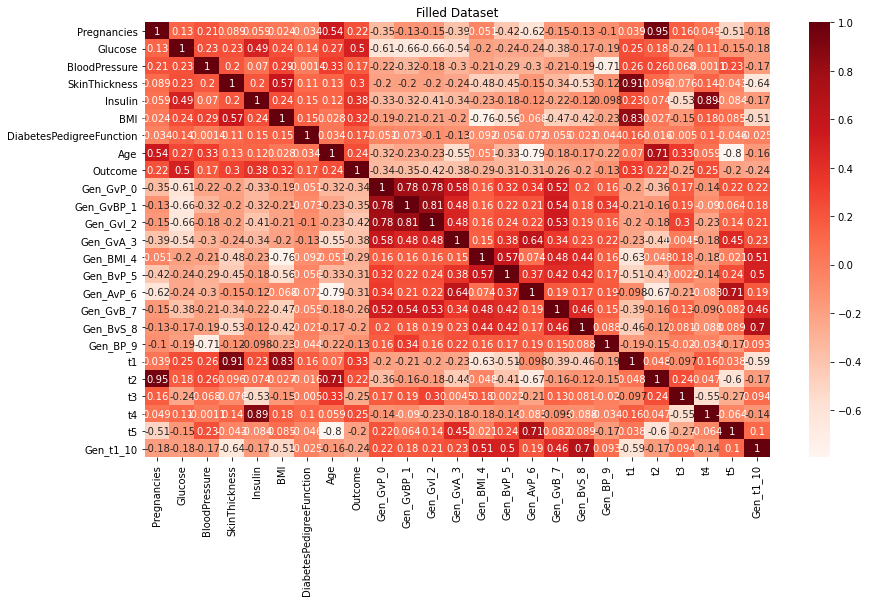

In [137]:
plt.figure(figsize = (14, 8))
sns.heatmap(data.corr(), annot = True, cmap = 'Reds')
plt.title("Filled Dataset")
plt.show()

In [138]:
#data.drop(["test"], axis = 1, inplace = True) 

In [139]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Gen_GvP_0',
       'Gen_GvBP_1', 'Gen_GvI_2', 'Gen_GvA_3', 'Gen_BMI_4', 'Gen_BvP_5',
       'Gen_AvP_6', 'Gen_GvB_7', 'Gen_BvS_8', 'Gen_BP_9', 't1', 't2', 't3',
       't4', 't5', 'Gen_t1_10'],
      dtype='object')

In [140]:
data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Gen_GvP_0',
       'Gen_GvBP_1', 'Gen_GvI_2', 'Gen_GvA_3', 'Gen_BMI_4', 'Gen_BvP_5',
       'Gen_AvP_6', 'Gen_GvB_7', 'Gen_BvS_8', 'Gen_BP_9', 'Num_1', 'Num_2', 'Num_3',
       'Num_4', 'Num_5', 'Gen_t1_10']

In [141]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0,...,Gen_AvP_6,Gen_GvB_7,Gen_BvS_8,Gen_BP_9,Num_1,Num_2,Num_3,Num_4,Num_5,Gen_t1_10
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,...,0,0,0,1,1176.0,300,0.294985,1.145270,1.440000,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,...,0,1,0,1,771.4,31,0.302439,1.205882,2.129032,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,...,0,0,0,1,745.6,256,0.188791,0.926230,2.000000,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,...,1,0,0,1,646.3,21,0.223404,1.056180,3.142857,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,...,0,0,0,1,1508.5,0,0.196429,1.226277,1.212121,0


## Saving the Dataset with generated and numerical features

In [142]:
saved_dataset = data.copy()
saved_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0,...,Gen_AvP_6,Gen_GvB_7,Gen_BvS_8,Gen_BP_9,Num_1,Num_2,Num_3,Num_4,Num_5,Gen_t1_10
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,...,0,0,0,1,1176.0,300,0.294985,1.145270,1.440000,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,...,0,1,0,1,771.4,31,0.302439,1.205882,2.129032,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,...,0,0,0,1,745.6,256,0.188791,0.926230,2.000000,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,...,1,0,0,1,646.3,21,0.223404,1.056180,3.142857,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,...,0,0,0,1,1508.5,0,0.196429,1.226277,1.212121,0


In [143]:
data = saved_dataset.copy()
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0,...,Gen_AvP_6,Gen_GvB_7,Gen_BvS_8,Gen_BP_9,Num_1,Num_2,Num_3,Num_4,Num_5,Gen_t1_10
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,...,0,0,0,1,1176.0,300,0.294985,1.145270,1.440000,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,...,0,1,0,1,771.4,31,0.302439,1.205882,2.129032,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,...,0,0,0,1,745.6,256,0.188791,0.926230,2.000000,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,...,1,0,0,1,646.3,21,0.223404,1.056180,3.142857,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,...,0,0,0,1,1508.5,0,0.196429,1.226277,1.212121,0


In [144]:
saved_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0,...,Gen_AvP_6,Gen_GvB_7,Gen_BvS_8,Gen_BP_9,Num_1,Num_2,Num_3,Num_4,Num_5,Gen_t1_10
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,...,0,0,0,1,1176.0,300,0.294985,1.145270,1.440000,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,...,0,1,0,1,771.4,31,0.302439,1.205882,2.129032,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,...,0,0,0,1,745.6,256,0.188791,0.926230,2.000000,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,...,1,0,0,1,646.3,21,0.223404,1.056180,3.142857,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,...,0,0,0,1,1508.5,0,0.196429,1.226277,1.212121,0


# Principle Component Analysis

In [145]:
columns = data.columns
print(columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Gen_GvP_0',
       'Gen_GvBP_1', 'Gen_GvI_2', 'Gen_GvA_3', 'Gen_BMI_4', 'Gen_BvP_5',
       'Gen_AvP_6', 'Gen_GvB_7', 'Gen_BvS_8', 'Gen_BP_9', 'Num_1', 'Num_2',
       'Num_3', 'Num_4', 'Num_5', 'Gen_t1_10'],
      dtype='object')


Separating columns based on data type

In [146]:
cat_feat = ['Gen_GvP_0','Gen_GvBP_1', 'Gen_GvI_2', 'Gen_GvA_3', 'Gen_BMI_4', 'Gen_BvP_5',
            'Gen_AvP_6', 'Gen_GvB_7', 'Gen_BvS_8', 'Gen_BP_9', 'Gen_t1_10']
cont_feat = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 
            'DiabetesPedigreeFunction', 'Num_1', 'Num_2','Num_3', 'Num_4', 'Num_5']
num_feat = ['Pregnancies', 'Age']
taregt_var = ['Outcome']

In [147]:
PR = np.ceil(data['Pregnancies'].mean());
AG = np.ceil(data['Age'].mean());

In [148]:
data['Pregnancies'] = 0.5*(data['Pregnancies']- PR);
data['Age'] = 0.1*(data['Age']- AG);

In [149]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0,...,Gen_AvP_6,Gen_GvB_7,Gen_BvS_8,Gen_BP_9,Num_1,Num_2,Num_3,Num_4,Num_5,Gen_t1_10
0,1.0,148.0,72.0,35.0,169.5,33.6,0.627,1.6,1,0,...,0,0,0,1,1176.0,300,0.294985,1.145270,1.440000,0
1,-1.5,85.0,66.0,29.0,102.5,26.6,0.351,-0.3,0,1,...,0,1,0,1,771.4,31,0.302439,1.205882,2.129032,0
2,2.0,183.0,64.0,32.0,169.5,23.3,0.672,-0.2,1,0,...,0,0,0,1,745.6,256,0.188791,0.926230,2.000000,0
3,-1.5,89.0,66.0,23.0,94.0,28.1,0.167,-1.3,0,1,...,1,0,0,1,646.3,21,0.223404,1.056180,3.142857,0
4,-2.0,137.0,40.0,35.0,168.0,43.1,2.288,-0.1,1,0,...,0,0,0,1,1508.5,0,0.196429,1.226277,1.212121,0


Scaling the data

In [150]:
scaler = StandardScaler(copy = False);
data[cont_feat] = scaler.fit_transform(data[cont_feat].values);

Saving the scaler

In [150]:
dump(scaler, 'std_scaler.bin', compress=True)
#scaler=load('std_scaler.bin')

['std_scaler.bin']

In [151]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0,...,Gen_AvP_6,Gen_GvB_7,Gen_BvS_8,Gen_BP_9,Num_1,Num_2,Num_3,Num_4,Num_5,Gen_t1_10
0,1.0,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.6,1,0,...,0,0,0,1,0.436284,0.936914,-0.023905,-0.008200,-1.338080,0
1,-1.5,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.3,0,1,...,0,1,0,1,-0.455696,-0.736097,0.014204,0.100807,-0.350961,0
2,2.0,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.2,1,0,...,0,0,0,1,-0.512575,0.663262,-0.566853,-0.402130,-0.535814,0
3,-1.5,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.3,0,1,...,1,0,0,1,-0.731491,-0.798290,-0.389882,-0.168423,1.101462,0
4,-2.0,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.1,1,0,...,0,0,0,1,1.169312,-0.928897,-0.527802,0.137486,-1.664543,0


In [152]:
data_DPF = data.copy()
data = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'Outcome', 'Gen_GvP_0',
       'Gen_GvBP_1', 'Gen_GvI_2', 'Gen_GvA_3', 'Gen_BMI_4', 'Gen_BvP_5',
       'Gen_AvP_6', 'Gen_GvB_7', 'Gen_BvS_8', 'Gen_BP_9', 'Num_1', 'Num_2',
       'Num_3', 'Num_4', 'Num_5', 'Gen_t1_10']]
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome,Gen_GvP_0,Gen_GvBP_1,...,Gen_AvP_6,Gen_GvB_7,Gen_BvS_8,Gen_BP_9,Num_1,Num_2,Num_3,Num_4,Num_5,Gen_t1_10
0,1.0,0.864625,-0.032180,0.665181,0.311604,0.169483,1.6,1,0,0,...,0,0,0,1,0.436284,0.936914,-0.023905,-0.008200,-1.338080,0
1,-1.5,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.3,0,1,1,...,0,1,0,1,-0.455696,-0.736097,0.014204,0.100807,-0.350961,0
2,2.0,2.014265,-0.693438,0.327535,0.311604,-1.328478,-0.2,1,0,0,...,0,0,0,1,-0.512575,0.663262,-0.566853,-0.402130,-0.535814,0
3,-1.5,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-1.3,0,1,1,...,1,0,0,1,-0.731491,-0.798290,-0.389882,-0.168423,1.101462,0
4,-2.0,0.503310,-2.677212,0.665181,0.294758,1.551096,-0.1,1,0,0,...,0,0,0,1,1.169312,-0.928897,-0.527802,0.137486,-1.664543,0


In [153]:
data_DPF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gen_GvP_0,...,Gen_AvP_6,Gen_GvB_7,Gen_BvS_8,Gen_BP_9,Num_1,Num_2,Num_3,Num_4,Num_5,Gen_t1_10
0,1.0,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.6,1,0,...,0,0,0,1,0.436284,0.936914,-0.023905,-0.008200,-1.338080,0
1,-1.5,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.3,0,1,...,0,1,0,1,-0.455696,-0.736097,0.014204,0.100807,-0.350961,0
2,2.0,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.2,1,0,...,0,0,0,1,-0.512575,0.663262,-0.566853,-0.402130,-0.535814,0
3,-1.5,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.3,0,1,...,1,0,0,1,-0.731491,-0.798290,-0.389882,-0.168423,1.101462,0
4,-2.0,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.1,1,0,...,0,0,0,1,1.169312,-0.928897,-0.527802,0.137486,-1.664543,0


In [156]:
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'Num_1', 'Num_2',
       'Num_3', 'Num_4', 'Num_5']].iloc[:, :].values;
X.shape

(768, 12)

## Creating the PCA components

In [159]:
pca = PCA(n_components=12)
prePCA_X = pca.fit_transform(X)

In [160]:
dump(pca, 'pca.bin', compress=True)
#pca=load('pca.bin')

In [175]:
PCA_X.shape

(768, 12)

In [176]:
num_X = np.hstack((PCA_X,X))
num_X.shape

(768, 24)

In [177]:
num_X[0]

array([ 2.49067367,  0.49006503, -0.01232462,  1.15432496,  0.01849521,
       -0.40294476,  0.20199821, -0.38427456,  0.12465706,  0.03055461,
       -0.04274254, -0.00799145,  1.        ,  0.86462486, -0.03218035,
        0.66518138,  0.31160394,  0.16948251,  1.6       ,  0.43628365,
        0.93691434, -0.02390507, -0.00819995, -1.33808008])

In [178]:
df_num_X = pd.DataFrame(data=num_X, columns=['PCA_0','PCA_1','PCA_2','PCA_3','PCA_4','PCA_5',
                                             'PCA_6','PCA_7','PCA_8','PCA_9','PCA_10','PCA_11',
                                             'Pregnancies','Glucose','BloodPressure','SkinThickness',
                                             'Insulin','BMI','Age','Num_1','Num_2','Num_3','Num_4','Num_5'])
df_num_X.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,BloodPressure,SkinThickness,Insulin,BMI,Age,Num_1,Num_2,Num_3,Num_4,Num_5
0,2.490674,0.490065,-0.012325,1.154325,0.018495,-0.402945,0.201998,-0.384275,0.124657,0.030555,...,-0.032180,0.665181,0.311604,0.169483,1.6,0.436284,0.936914,-0.023905,-0.008200,-1.338080
1,-1.602404,-0.918521,-0.212236,0.758356,0.630621,0.804378,0.566296,-0.381368,-0.186915,-0.137161,...,-0.528124,-0.010112,-0.440843,-0.848549,-0.3,-0.455696,-0.736097,0.014204,0.100807,-0.350961
2,1.851160,-0.390550,-1.219694,-0.375196,-0.066938,-2.408254,1.042342,0.338790,-0.266549,0.107196,...,-0.693438,0.327535,0.311604,-1.328478,-0.2,-0.512575,0.663262,-0.566853,-0.402130,-0.535814
3,-2.619919,-0.991275,-0.326821,-0.659485,0.247009,0.307912,0.103035,-0.194544,0.282616,0.018554,...,-0.528124,-0.685405,-0.536303,-0.630399,-1.3,-0.731491,-0.798290,-0.389882,-0.168423,1.101462
4,-1.306145,1.570789,0.039245,2.709160,2.288982,-1.083394,-1.092380,-0.475775,0.017972,-0.057198,...,-2.677212,0.665181,0.294758,1.551096,-0.1,1.169312,-0.928897,-0.527802,0.137486,-1.664543


In [179]:
df_cat_X = data[['Gen_GvP_0','Gen_GvBP_1', 'Gen_GvI_2', 'Gen_GvA_3', 'Gen_BMI_4', 'Gen_BvP_5',
            'Gen_AvP_6', 'Gen_GvB_7', 'Gen_BvS_8', 'Gen_BP_9', 'Gen_t1_10']]
df_cat_X.head()

,Gen_GvP_0,Gen_GvBP_1,Gen_GvI_2,Gen_GvA_3,Gen_BMI_4,Gen_BvP_5,Gen_AvP_6,Gen_GvB_7,Gen_BvS_8,Gen_BP_9,Gen_t1_10
0,0,0,0,0,0,0,0,0,0,1,0
1,1,1,1,0,1,1,0,1,0,1,0
2,0,0,0,0,1,0,0,0,0,1,0
3,1,1,1,1,1,1,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0


In [180]:
df_y = data['Outcome']
df_y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [181]:
final_data = df_num_X.merge(df_cat_X ,left_index=True , right_index=True, how = "left")
final_data.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,Gen_GvBP_1,Gen_GvI_2,Gen_GvA_3,Gen_BMI_4,Gen_BvP_5,Gen_AvP_6,Gen_GvB_7,Gen_BvS_8,Gen_BP_9,Gen_t1_10
0,2.490674,0.490065,-0.012325,1.154325,0.018495,-0.402945,0.201998,-0.384275,0.124657,0.030555,...,0,0,0,0,0,0,0,0,1,0
1,-1.602404,-0.918521,-0.212236,0.758356,0.630621,0.804378,0.566296,-0.381368,-0.186915,-0.137161,...,1,1,0,1,1,0,1,0,1,0
2,1.851160,-0.390550,-1.219694,-0.375196,-0.066938,-2.408254,1.042342,0.338790,-0.266549,0.107196,...,0,0,0,1,0,0,0,0,1,0
3,-2.619919,-0.991275,-0.326821,-0.659485,0.247009,0.307912,0.103035,-0.194544,0.282616,0.018554,...,1,1,1,1,1,1,0,0,1,0
4,-1.306145,1.570789,0.039245,2.709160,2.288982,-1.083394,-1.092380,-0.475775,0.017972,-0.057198,...,0,0,0,0,0,0,0,0,1,0


Appending all dataframes into one

In [182]:
final_data = final_data.merge(df_y, left_index=True, right_index=True, how='left')
final_data.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,Gen_GvI_2,Gen_GvA_3,Gen_BMI_4,Gen_BvP_5,Gen_AvP_6,Gen_GvB_7,Gen_BvS_8,Gen_BP_9,Gen_t1_10,Outcome
0,2.490674,0.490065,-0.012325,1.154325,0.018495,-0.402945,0.201998,-0.384275,0.124657,0.030555,...,0,0,0,0,0,0,0,1,0,1
1,-1.602404,-0.918521,-0.212236,0.758356,0.630621,0.804378,0.566296,-0.381368,-0.186915,-0.137161,...,1,0,1,1,0,1,0,1,0,0
2,1.851160,-0.390550,-1.219694,-0.375196,-0.066938,-2.408254,1.042342,0.338790,-0.266549,0.107196,...,0,0,1,0,0,0,0,1,0,1
3,-2.619919,-0.991275,-0.326821,-0.659485,0.247009,0.307912,0.103035,-0.194544,0.282616,0.018554,...,1,1,1,1,1,0,0,1,0,0
4,-1.306145,1.570789,0.039245,2.709160,2.288982,-1.083394,-1.092380,-0.475775,0.017972,-0.057198,...,0,0,0,0,0,0,0,1,0,1


In [184]:
final_data.columns

Index(['PCA_0', 'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7',
       'PCA_8', 'PCA_9', 'PCA_10', 'PCA_11', 'Pregnancies', 'Glucose',
       'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Num_1',
       'Num_2', 'Num_3', 'Num_4', 'Num_5', 'Gen_GvP_0', 'Gen_GvBP_1',
       'Gen_GvI_2', 'Gen_GvA_3', 'Gen_BMI_4', 'Gen_BvP_5', 'Gen_AvP_6',
       'Gen_GvB_7', 'Gen_BvS_8', 'Gen_BP_9', 'Gen_t1_10', 'Outcome'],
      dtype='object')

In [192]:
final_data.iloc[0,:]

PCA_0            2.490674
PCA_1            0.490065
PCA_2           -0.012325
PCA_3            1.154325
PCA_4            0.018495
PCA_5           -0.402945
PCA_6            0.201998
PCA_7           -0.384275
PCA_8            0.124657
PCA_9            0.030555
PCA_10          -0.042743
PCA_11          -0.007991
Pregnancies      1.000000
Glucose          0.864625
BloodPressure   -0.032180
SkinThickness    0.665181
Insulin          0.311604
BMI              0.169483
Age              1.600000
Num_1            0.436284
Num_2            0.936914
Num_3           -0.023905
Num_4           -0.008200
Num_5           -1.338080
Gen_GvP_0        0.000000
Gen_GvBP_1       0.000000
Gen_GvI_2        0.000000
Gen_GvA_3        0.000000
Gen_BMI_4        0.000000
Gen_BvP_5        0.000000
Gen_AvP_6        0.000000
Gen_GvB_7        0.000000
Gen_BvS_8        0.000000
Gen_BP_9         1.000000
Gen_t1_10        0.000000
Outcome          1.000000
Name: 0, dtype: float64

## Final Correlation Map

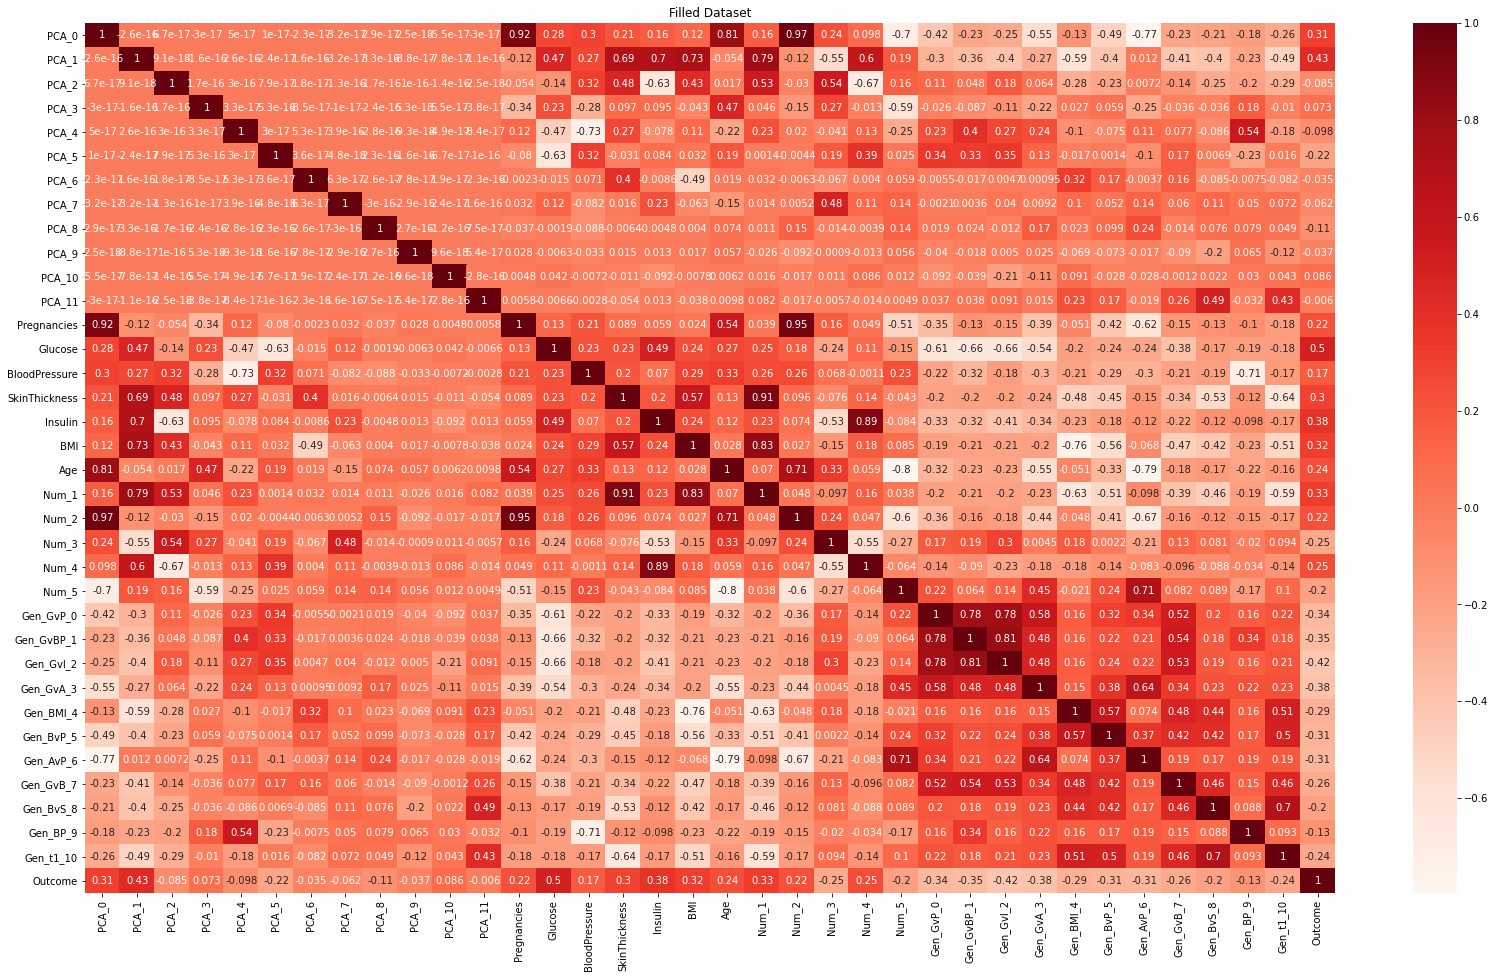

In [142]:
plt.figure(figsize = (28, 16))
sns.heatmap(final_data.corr(), annot = True, cmap = 'Reds')
plt.title("Filled Dataset")
plt.show()

# Saving the Dataset

In [151]:
final_data.to_csv('F:/diabetes-FINAL(PCA+FE).csv')

In [4]:
scaler=load('../scaler/std_scaler.bin')

In [ ]:
data = 

In [186]:
a = {'a':1, 'b':2, 'c':3}

In [187]:
a['d']=4

In [188]:
a

{'a': 1, 'b': 2, 'c': 3, 'd': 4}

In [190]:
list(a.values())

[1, 2, 3, 4]

In [193]:
[2]+[3]+[1.1,2,3.4,5.6]

[2, 3, 1.1, 2, 3.4, 5.6]

In [205]:
f = [2.490673668577902, 0.4900650313007739, -0.4029447584006345, 0.12465705688419082,
 1.0, 0.8646248649782214, -0.03218035445955846, 0.6651813798220237, 0.3116039445295737,
 0.16948250844524612, -1.4251224333235513, 1.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
 0.43628365047628487, 0.9369143445550132, -0.023905069094154296, -0.008199954578574488, -1.338080082506359, 0]

In [206]:
f = f[0:10]+[f[11]]+f[22:27]+f[12:22]+[f[27]]

In [207]:
f = np.asarray(f)

In [209]:
f.shape

(27,)

In [211]:
f = np.reshape(f, (-1,27))

In [212]:
f

array([[ 2.49067367,  0.49006503, -0.40294476,  0.12465706,  1.        ,
         0.86462486, -0.03218035,  0.66518138,  0.31160394,  0.16948251,
         1.6       ,  0.43628365,  0.93691434, -0.02390507, -0.00819995,
        -1.33808008,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ]])